<a href="https://colab.research.google.com/github/zainamri/tugas/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from imblearn.over_sampling import SMOTE


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/migraine_data.csv')

Mounted at /content/drive


In [3]:
# Menampilkan 5 data teratas
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [4]:
# Menampilkan Info Data (tipe data dan jumlah nilai non-null)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [5]:
# Statistik deskriptif untuk melihat data numerik
data.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [6]:
# Mengecek nilai kosong
print(data.isnull().sum())

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64


In [7]:
# Menampilkan jumlah masing-masing tipe migrain (target)
print("Unique target values:\n", data['Type'].value_counts())

Unique target values:
 Type
Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64


/tmp/ipython-input-8-3474663993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Type', palette='viridis')


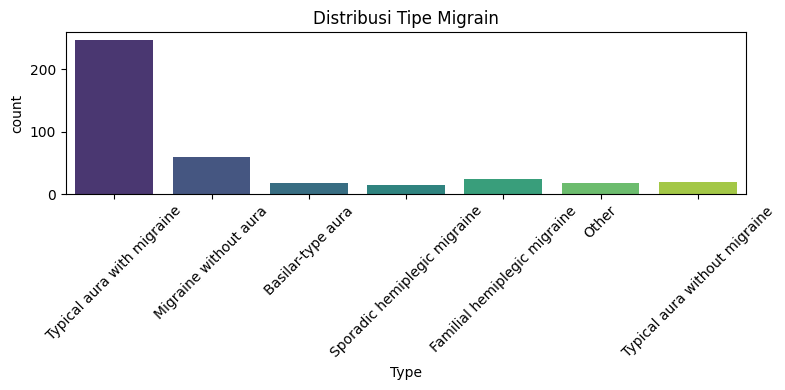

In [8]:
# Distribusi tipe migrain/ distribusi target
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Type', palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi Tipe Migrain')
plt.tight_layout()
plt.show()

In [9]:
# Label encoding untuk kolom 'Type' menjadi angka
le = LabelEncoder()
data['Type_encoded'] = le.fit_transform(data['Type'])

In [10]:
# Menyimpan nama kelas untuk laporan akhir nanti
class_names = le.classes_

In [11]:
# Matriks korelasi antar fitur
correlation_matrix = data.corr(numeric_only=True)

# Korelasi fitur terhadap target
corr_to_target = correlation_matrix['Type_encoded'].sort_values(ascending=False)
print("Korelasi fitur terhadap target:\n", corr_to_target)


Korelasi fitur terhadap target:
 Type_encoded    1.000000
Visual          0.454947
Sensory         0.149789
Phonophobia     0.093375
Photophobia     0.087923
Age             0.069991
Nausea          0.028312
Dysarthria     -0.000455
Vomit          -0.129511
Frequency      -0.146886
Dysphasia      -0.153399
Diplopia       -0.172581
DPF            -0.177101
Duration       -0.178484
Paresthesia    -0.211634
Conscience     -0.243991
Location       -0.276384
Character      -0.277885
Tinnitus       -0.295922
Hypoacusis     -0.300432
Defect         -0.300432
Vertigo        -0.370132
Intensity      -0.392680
Ataxia               NaN
Name: Type_encoded, dtype: float64


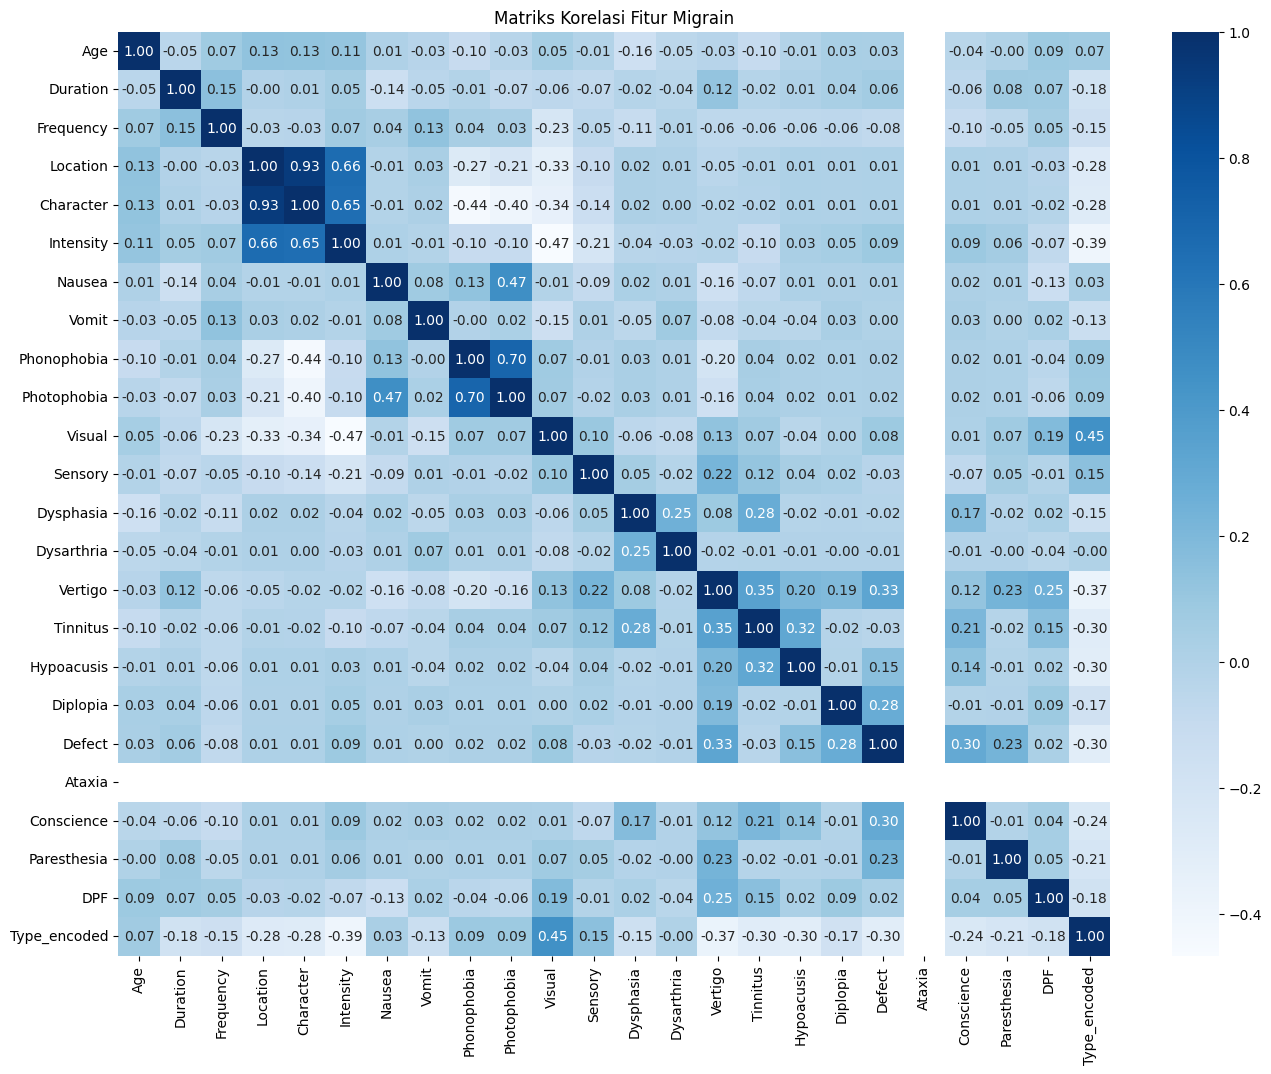

In [12]:
# Visualisasi matriks korelasi antar fitur menggunakan heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriks Korelasi Fitur Migrain")
plt.show()

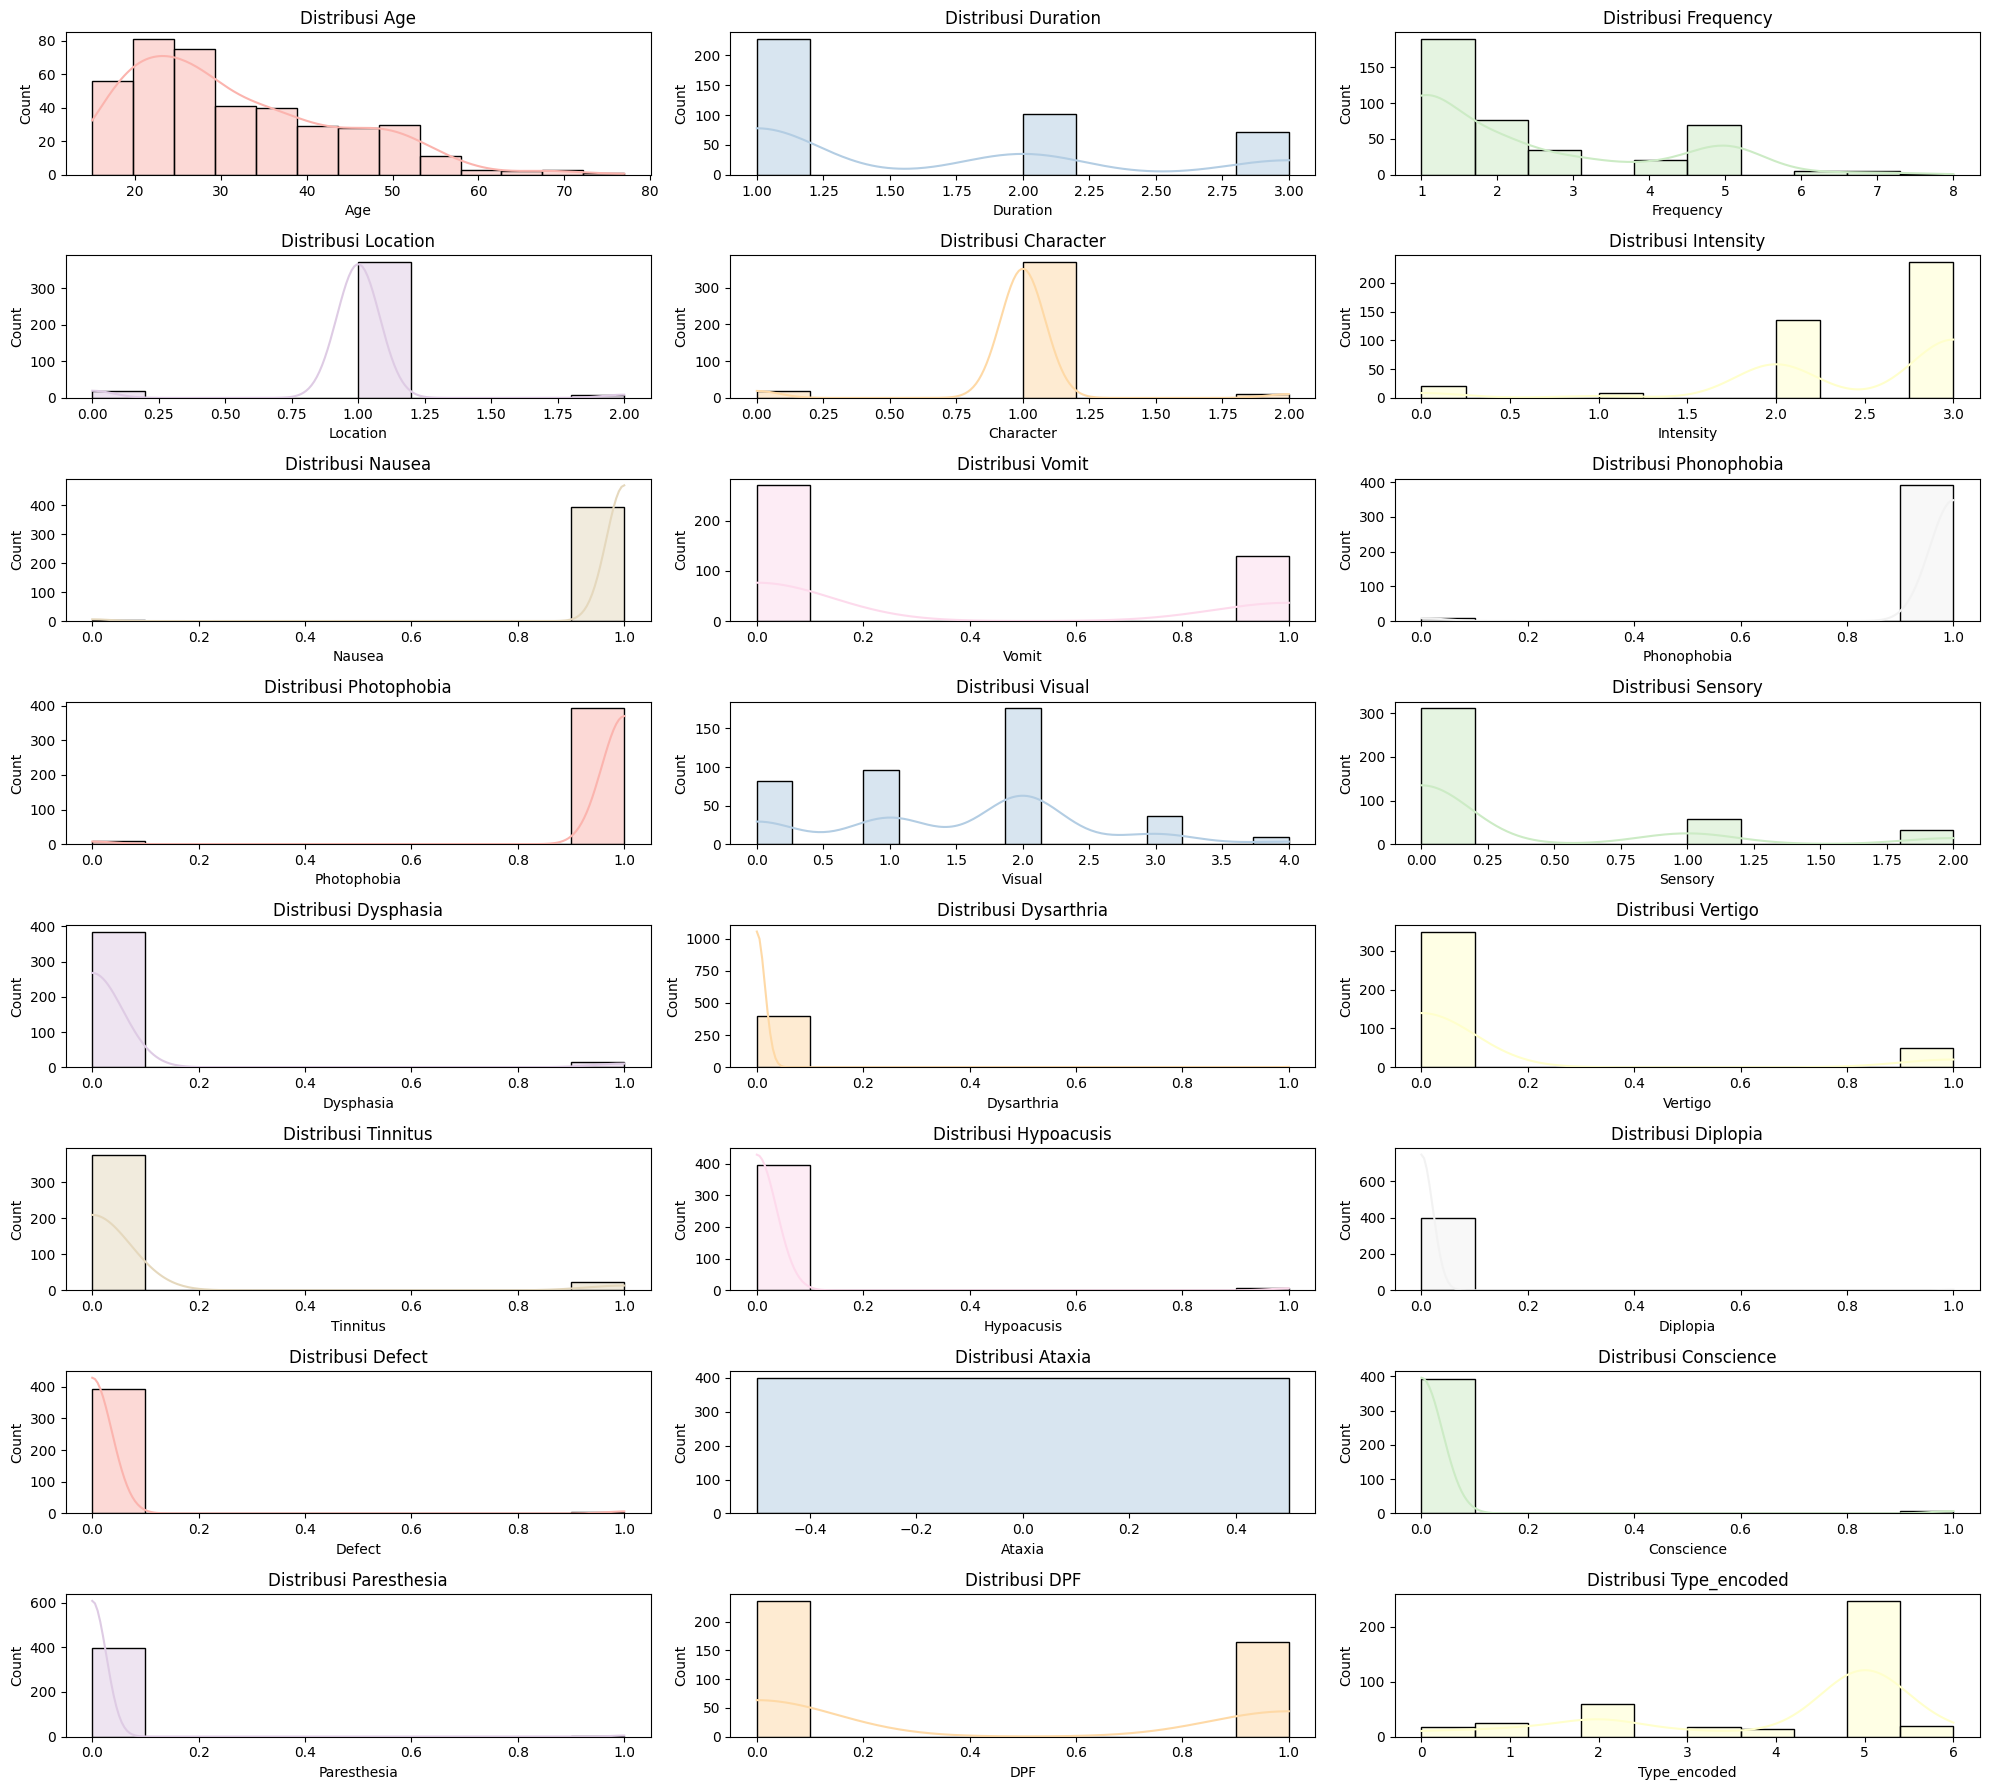

In [13]:
# Visualisasi distribusi dari fitur-fitur numerik
pastel_colors = sns.color_palette("Pastel1", len(data.corr(numeric_only=True).columns))
plt.figure(figsize=(20, 18))
for i, column in enumerate(data.corr(numeric_only=True).columns, 1):
    plt.subplot(8, 3, i)  # Menampilkan 8 baris dan 3 kolom
    sns.histplot(data[column], kde=True, color=pastel_colors[i-1])
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Jumlah data dengan outlier: 151


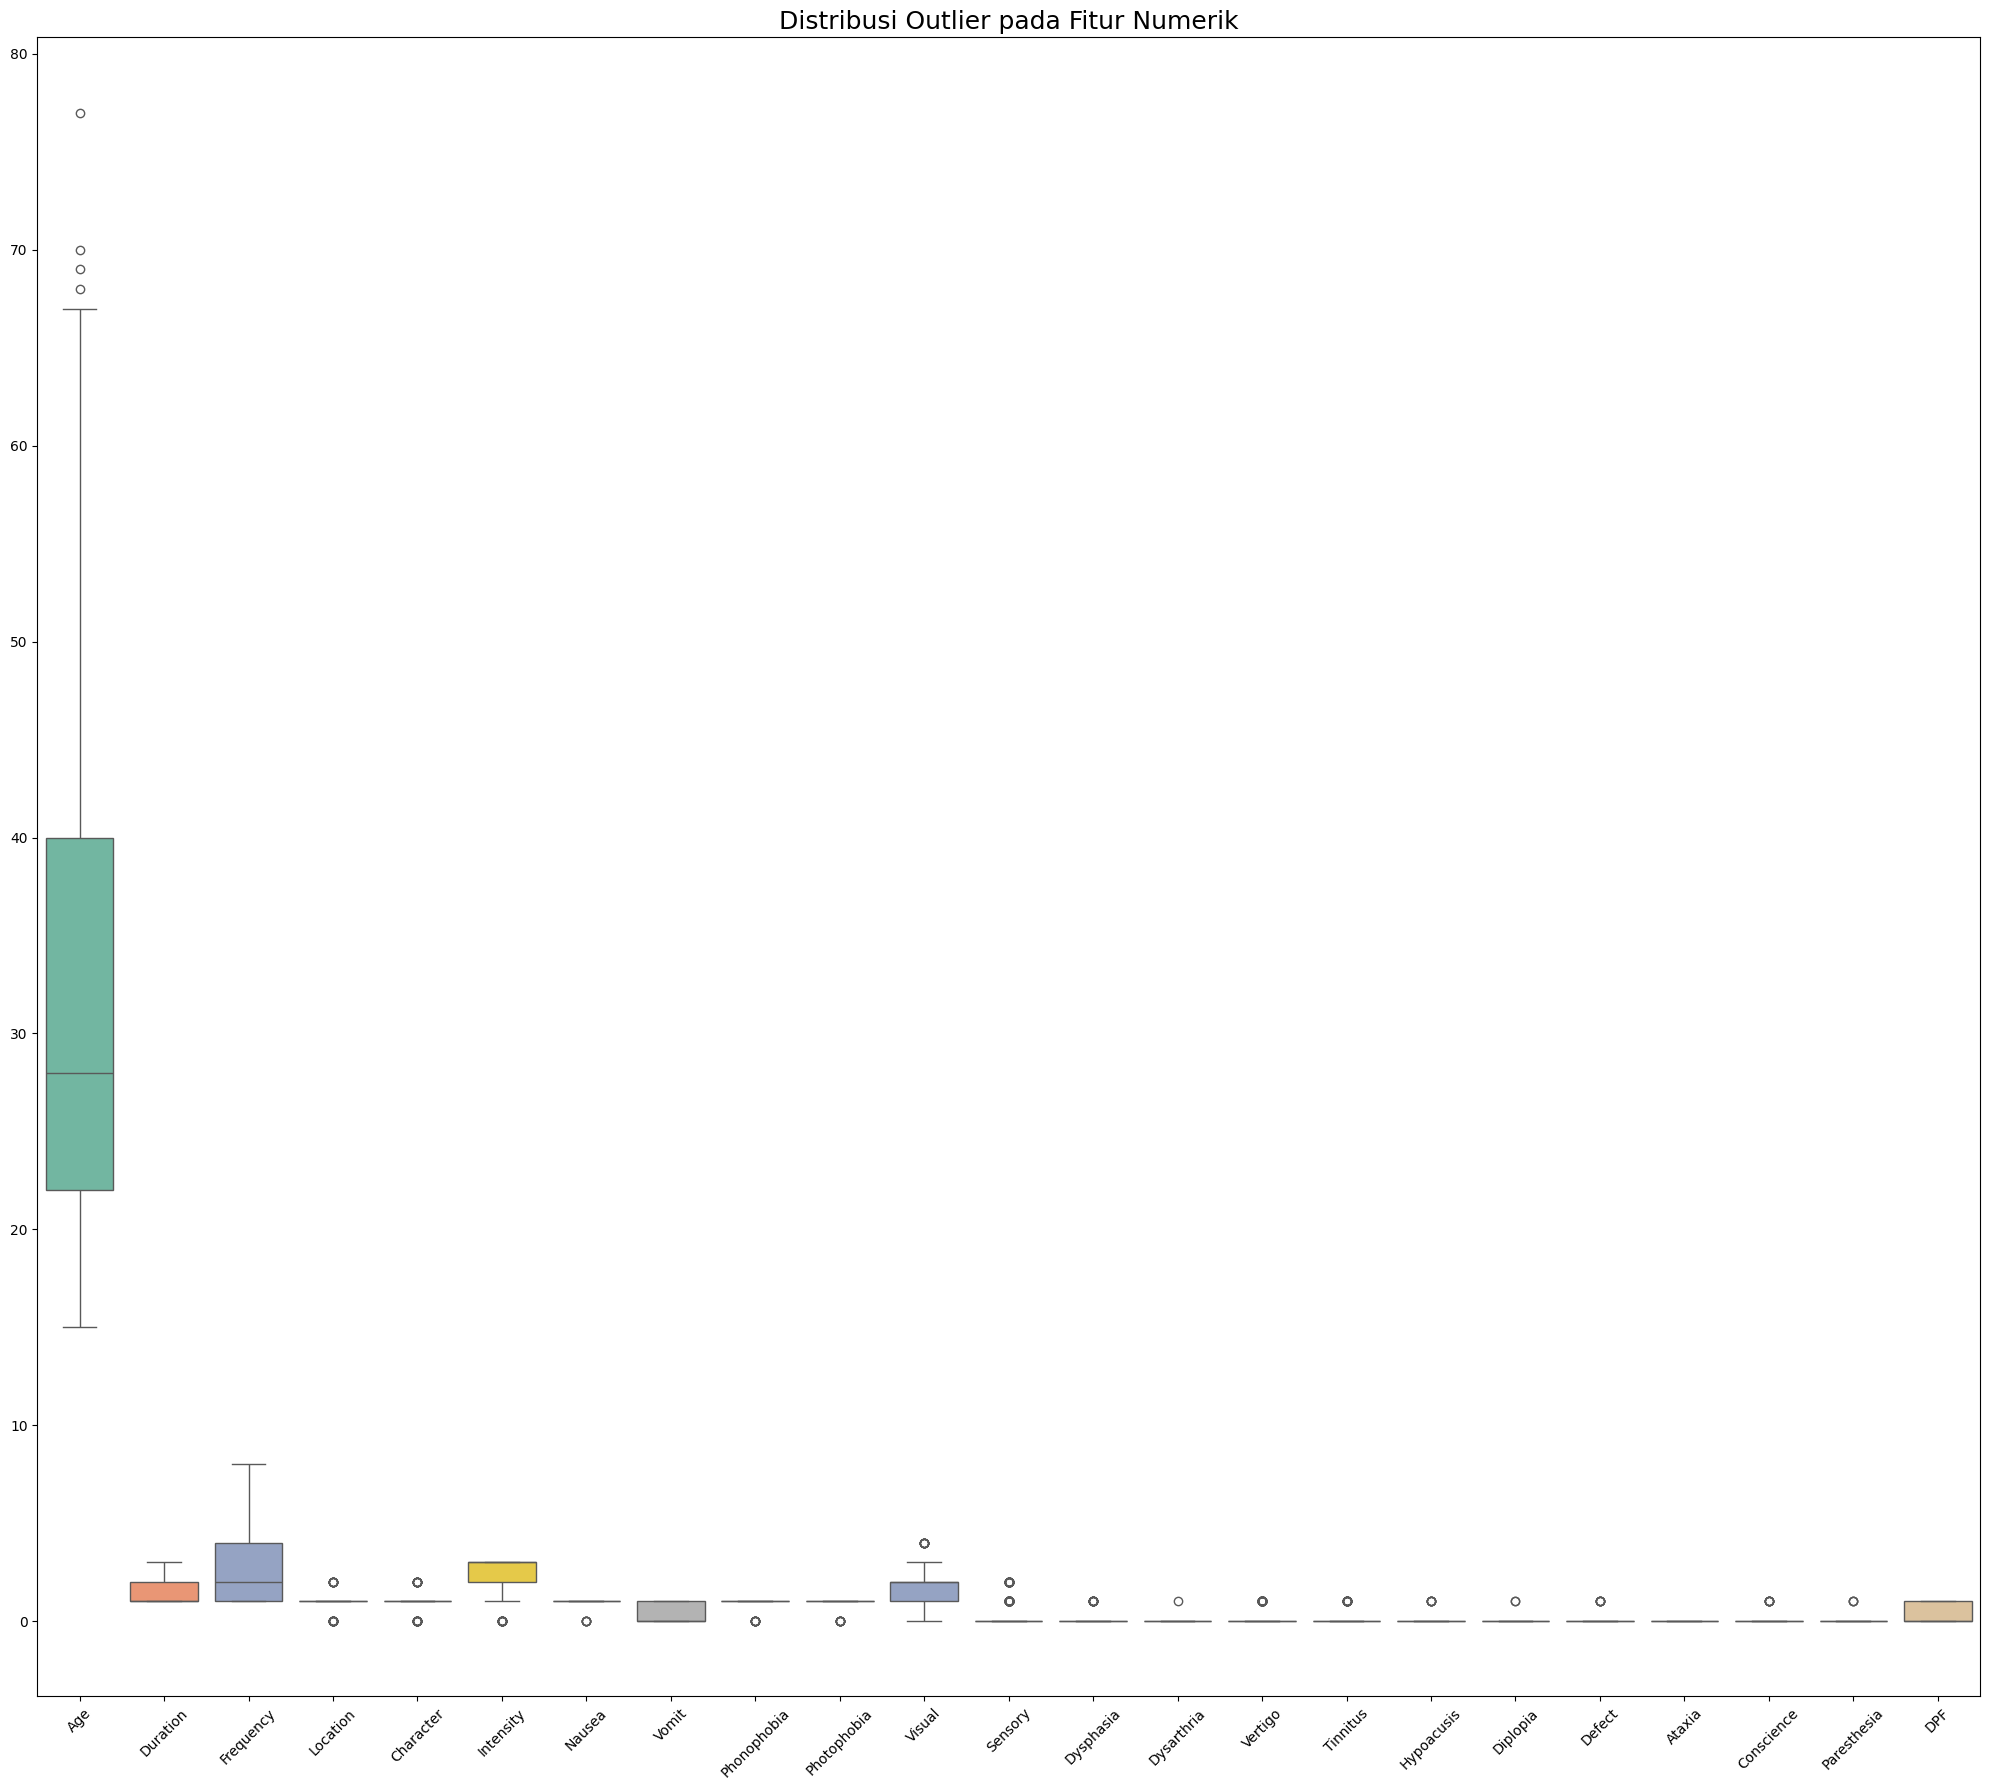

In [14]:
# Menentukan fitur numerik untuk boxplot
numerical_features = ['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
                      'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
                      'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia',
                      'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF']

# Menghitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = (data[numerical_features] < lower_bound) | (data[numerical_features] > upper_bound)

# Menampilkan baris dengan outlier
outlier_rows = data[outliers.any(axis=1)]
print(f"Jumlah data dengan outlier: {outlier_rows.shape[0]}")

# Visualisasi Boxplot untuk melihat outlier pada seluruh fitur numerik
plt.figure(figsize=(20, 18))
sns.boxplot(data=data[numerical_features], palette='Set2')
plt.xticks(rotation=45)  # Memutar label agar lebih jelas
plt.title('Distribusi Outlier pada Fitur Numerik', fontsize=18)
plt.tight_layout()
plt.show()

In [15]:
# Menghapus kolom 'Ataxia' yang tidak memiliki variasi
if 'Ataxia' in data.columns:
    data = data.drop(columns=['Ataxia'])

In [16]:
from scipy.stats import f_oneway
import pandas as pd

# Pisahkan fitur dan target
X = data.drop(columns=['Type', 'Type_encoded'])
y = data['Type_encoded']

# Dictionary untuk menyimpan p-value
anova_test_results = {}

# Loop setiap fitur numerik
for feature in X.columns:
    # Ambil nilai-nilai fitur berdasarkan kelas target
    groups = [X[feature][y == cls] for cls in y.unique()]

    # Lakukan uji ANOVA
    stat, pval = f_oneway(*groups)
    anova_test_results[feature] = pval

# Ubah ke dalam bentuk DataFrame
anova_test_df = pd.DataFrame({
    'Fitur': list(anova_test_results.keys()),
    'p-value': list(anova_test_results.values())
}).sort_values(by='p-value')

# Tandai fitur signifikan
anova_test_df['Signifikan (<0.05)'] = anova_test_df['p-value'] < 0.05

# Tampilkan hasil
print("\nHasil Uji ANOVA (One-Way) per Fitur:\n")
print(anova_test_df)



Hasil Uji ANOVA (One-Way) per Fitur:

          Fitur        p-value  Signifikan (<0.05)
4     Character  2.752810e-173                True
3      Location  7.423795e-160                True
5     Intensity   1.186715e-81                True
10       Visual   1.187774e-59                True
8   Phonophobia   2.198044e-59                True
9   Photophobia   1.180561e-49                True
14      Vertigo   3.775174e-42                True
16   Hypoacusis   1.019170e-30                True
18       Defect   1.019170e-30                True
12    Dysphasia   9.315895e-26                True
15     Tinnitus   3.113669e-21                True
2     Frequency   1.386190e-19                True
6        Nausea   1.198590e-15                True
21          DPF   4.525453e-13                True
20  Paresthesia   6.440093e-13                True
19   Conscience   1.225968e-10                True
17     Diplopia   5.771114e-08                True
0           Age   4.912986e-07             

In [17]:
from scipy.stats import f_oneway

# Siapkan X dan y
X = data.drop(columns=['Type', 'Type_encoded'])
y = data['Type_encoded']

# Simpan fitur signifikan
relevant_features = []

# Loop dan uji ANOVA
for feature in X.columns:
    groups = [X[feature][y == cls] for cls in y.unique()]
    stat, pval = f_oneway(*groups)
    if pval < 0.05:
        relevant_features.append(feature)

print("Fitur relevan berdasarkan uji ANOVA (p < 0.05):")
print(relevant_features)

Fitur relevan berdasarkan uji ANOVA (p < 0.05):
['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity', 'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Conscience', 'Paresthesia', 'DPF']


In [18]:
# Menyiapkan data X (fitur) dan y (target)
X = data[relevant_features]
y = data['Type_encoded']

----

In [19]:
# Pertama, kita pisahkan 70% untuk training, dan 30% untuk sisa (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,      # 30% data dipisahkan untuk non-training
    random_state=42,
    stratify=y
)

# Kedua, kita bagi sisa yang 30% tadi menjadi dua, 50% untuk validation dan 50% untuk test
# Ini akan menghasilkan 15% validation dan 15% test dari total data asli.
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,      # Dibagi 2 sama rata
    random_state=42,
    stratify=y_temp
)

print(f"Ukuran Data Training   : {X_train.shape[0]} baris")
print(f"Ukuran Data Validation : {X_val.shape[0]} baris")
print(f"Ukuran Data Testing    : {X_test.shape[0]} baris")

Ukuran Data Training   : 280 baris
Ukuran Data Validation : 60 baris
Ukuran Data Testing    : 60 baris


In [20]:
# Scaler 'belajar' HANYA dari data training untuk menghindari kebocoran informasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print("\nScaling data selesai.")


Scaling data selesai.


algo 1

In [21]:
# --- ALGORITMA 1: RANDOM FOREST CLASSIFIER ---
print("\n\n--- Hasil untuk Algoritma 1: Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluasi pada masing-masing set data
acc_train_rf = accuracy_score(y_train, rf_model.predict(X_train))
acc_val_rf = accuracy_score(y_val, rf_model.predict(X_val))
acc_test_rf = accuracy_score(y_test, rf_model.predict(X_test))

print(f"\nSkor Akurasi Data Training   : {acc_train_rf:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_rf:.4f}  ")
print(f"Skor Akurasi Data Testing    : {acc_test_rf:.4f}  ")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, rf_model.predict(X_test), target_names=class_names, zero_division=0))




--- Hasil untuk Algoritma 1: Random Forest ---

Skor Akurasi Data Training   : 1.0000
Skor Akurasi Data Validation : 0.9000  
Skor Akurasi Data Testing    : 0.9000  

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.33      0.50         3
 Familial hemiplegic migraine       0.57      1.00      0.73         4
        Migraine without aura       0.90      1.00      0.95         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       1.00      0.50      0.67         2
   Typical aura with migraine       0.95      0.95      0.95        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.90        60
                    macro avg       0.92      0.75      0.78        60
                 weighted avg       0.92      0.90      0.89        60



algo 2

In [22]:
# --- ALGORITMA 2: SUPPORT VECTOR CLASSIFIER (SVC) ---
print("\n\n--- Hasil untuk Algoritma 2: Support Vector Classifier (SVC) ---")
# Ingat! SVC menggunakan data yang sudah di-scaling
svc_model = SVC(random_state=42, class_weight='balanced')
svc_model.fit(X_train_scaled, y_train)

# Evaluasi pada masing-masing set data
acc_train_svc = accuracy_score(y_train, svc_model.predict(X_train_scaled))
acc_val_svc = accuracy_score(y_val, svc_model.predict(X_val_scaled))
acc_test_svc = accuracy_score(y_test, svc_model.predict(X_test_scaled))

print(f"\nSkor Akurasi Data Training   : {acc_train_svc:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_svc:.4f}  ")
print(f"Skor Akurasi Data Testing    : {acc_test_svc:.4f}  ")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, svc_model.predict(X_test_scaled), target_names=class_names, zero_division=0))



--- Hasil untuk Algoritma 2: Support Vector Classifier (SVC) ---

Skor Akurasi Data Training   : 0.8893
Skor Akurasi Data Validation : 0.8000  
Skor Akurasi Data Testing    : 0.7500  

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.25      1.00      0.40         4
        Migraine without aura       0.90      1.00      0.95         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.67      1.00      0.80         2
   Typical aura with migraine       0.96      0.65      0.77        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.75        60
                    macro avg       0.83      0.83      0.77        60
                 weighted avg       0.90      0.75    

algo 3

In [24]:
# --- ALGORITMA 3: GRADIENT BOOSTING CLASSIFIER ---
print("\n\n--- Hasil untuk Algoritma 3: Gradient Boosting ---")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluasi pada masing-masing set data (INI BAGIAN YANG DIPERBAIKI)
acc_train_gb = accuracy_score(y_train, gb_model.predict(X_train))
acc_val_gb = accuracy_score(y_val, gb_model.predict(X_val))
acc_test_gb = accuracy_score(y_test, gb_model.predict(X_test))

print(f"\nSkor Akurasi Data Training   : {acc_train_gb:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_gb:.4f}  ")
print(f"Skor Akurasi Data Testing    : {acc_test_gb:.4f}  ")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, gb_model.predict(X_test), target_names=class_names, zero_division=0))



--- Hasil untuk Algoritma 3: Gradient Boosting ---

Skor Akurasi Data Training   : 1.0000
Skor Akurasi Data Validation : 0.9333  
Skor Akurasi Data Testing    : 0.8833  

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.50      1.00      0.67         4
        Migraine without aura       0.90      1.00      0.95         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.50      0.50      0.50         2
   Typical aura with migraine       0.97      0.89      0.93        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.88        60
                    macro avg       0.84      0.79      0.79        60
                 weighted avg       0.92      0.88      0.89        

In [25]:
from sklearn.neighbors import KNeighborsClassifier

print("\n\n--- Hasil untuk Algoritma 4: K-Nearest Neighbors ---")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

acc_train_knn = accuracy_score(y_train, knn_model.predict(X_train_scaled))
acc_val_knn = accuracy_score(y_val, knn_model.predict(X_val_scaled))
acc_test_knn = accuracy_score(y_test, knn_model.predict(X_test_scaled))

print(f"\nSkor Akurasi Data Training   : {acc_train_knn:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_knn:.4f}")
print(f"Skor Akurasi Data Testing    : {acc_test_knn:.4f}")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, knn_model.predict(X_test_scaled), target_names=class_names, zero_division=0))




--- Hasil untuk Algoritma 4: K-Nearest Neighbors ---

Skor Akurasi Data Training   : 0.8964
Skor Akurasi Data Validation : 0.8833
Skor Akurasi Data Testing    : 0.9333

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.75      0.75      0.75         4
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.67      1.00      0.80         2
   Typical aura with migraine       0.95      0.97      0.96        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.93        60
                    macro avg       0.91      0.84      0.85        60
                 weighted avg       0.94      0.93      0.93        60

In [26]:
from sklearn.tree import DecisionTreeClassifier

print("\n\n--- Hasil untuk Algoritma 5: Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

acc_train_dt = accuracy_score(y_train, dt_model.predict(X_train))
acc_val_dt = accuracy_score(y_val, dt_model.predict(X_val))
acc_test_dt = accuracy_score(y_test, dt_model.predict(X_test))

print(f"\nSkor Akurasi Data Training   : {acc_train_dt:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_dt:.4f}")
print(f"Skor Akurasi Data Testing    : {acc_test_dt:.4f}")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, dt_model.predict(X_test), target_names=class_names, zero_division=0))




--- Hasil untuk Algoritma 5: Decision Tree ---

Skor Akurasi Data Training   : 1.0000
Skor Akurasi Data Validation : 0.8333
Skor Akurasi Data Testing    : 0.9167

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.57      1.00      0.73         4
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.67      1.00      0.80         2
   Typical aura with migraine       0.97      0.92      0.94        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.92        60
                    macro avg       0.89      0.87      0.85        60
                 weighted avg       0.94      0.92      0.92        60



In [27]:
from sklearn.linear_model import LogisticRegression

print("\n\n--- Hasil untuk Algoritma 6: Logistic Regression ---")
lr_model = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

acc_train_lr = accuracy_score(y_train, lr_model.predict(X_train_scaled))
acc_val_lr = accuracy_score(y_val, lr_model.predict(X_val_scaled))
acc_test_lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))

print(f"\nSkor Akurasi Data Training   : {acc_train_lr:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_lr:.4f}")
print(f"Skor Akurasi Data Testing    : {acc_test_lr:.4f}")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, lr_model.predict(X_test_scaled), target_names=class_names, zero_division=0))




--- Hasil untuk Algoritma 6: Logistic Regression ---

Skor Akurasi Data Training   : 0.9143
Skor Akurasi Data Validation : 0.9500
Skor Akurasi Data Testing    : 0.8500

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.40      1.00      0.57         4
        Migraine without aura       0.90      1.00      0.95         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.67      1.00      0.80         2
   Typical aura with migraine       0.97      0.81      0.88        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.85        60
                    macro avg       0.85      0.85      0.81        60
                 weighted avg       0.91      0.85      0.86        60

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [28]:
from sklearn.naive_bayes import GaussianNB

print("\n\n--- Hasil untuk Algoritma 7: Naive Bayes ---")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

acc_train_nb = accuracy_score(y_train, nb_model.predict(X_train_scaled))
acc_val_nb = accuracy_score(y_val, nb_model.predict(X_val_scaled))
acc_test_nb = accuracy_score(y_test, nb_model.predict(X_test_scaled))

print(f"\nSkor Akurasi Data Training   : {acc_train_nb:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_nb:.4f}")
print(f"Skor Akurasi Data Testing    : {acc_test_nb:.4f}")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, nb_model.predict(X_test_scaled), target_names=class_names, zero_division=0))




--- Hasil untuk Algoritma 7: Naive Bayes ---

Skor Akurasi Data Training   : 0.7536
Skor Akurasi Data Validation : 0.8167
Skor Akurasi Data Testing    : 0.7833

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.75      0.75      0.75         4
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      1.00      1.00         2
 Sporadic hemiplegic migraine       0.15      1.00      0.27         2
   Typical aura with migraine       0.96      0.70      0.81        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.78        60
                    macro avg       0.84      0.87      0.80        60
                 weighted avg       0.93      0.78      0.83        60



In [29]:
from sklearn.ensemble import ExtraTreesClassifier

print("\n\n--- Hasil untuk Algoritma 8: Extra Trees Classifier ---")
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_model.fit(X_train, y_train)

acc_train_et = accuracy_score(y_train, et_model.predict(X_train))
acc_val_et = accuracy_score(y_val, et_model.predict(X_val))
acc_test_et = accuracy_score(y_test, et_model.predict(X_test))

print(f"\nSkor Akurasi Data Training   : {acc_train_et:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_et:.4f}")
print(f"Skor Akurasi Data Testing    : {acc_test_et:.4f}")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, et_model.predict(X_test), target_names=class_names, zero_division=0))




--- Hasil untuk Algoritma 8: Extra Trees Classifier ---

Skor Akurasi Data Training   : 1.0000
Skor Akurasi Data Validation : 0.8667
Skor Akurasi Data Testing    : 0.9167

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.60      0.75      0.67         4
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.67      1.00      0.80         2
   Typical aura with migraine       0.95      0.95      0.95        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.92        60
                    macro avg       0.89      0.84      0.84        60
                 weighted avg       0.93      0.92      0.92       

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print("\n\n--- Hasil untuk Algoritma 9: Linear Discriminant Analysis (LDA) ---")
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

acc_train_lda = accuracy_score(y_train, lda_model.predict(X_train_scaled))
acc_val_lda = accuracy_score(y_val, lda_model.predict(X_val_scaled))
acc_test_lda = accuracy_score(y_test, lda_model.predict(X_test_scaled))

print(f"\nSkor Akurasi Data Training   : {acc_train_lda:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_lda:.4f}")
print(f"Skor Akurasi Data Testing    : {acc_test_lda:.4f}")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, lda_model.predict(X_test_scaled), target_names=class_names, zero_division=0))



--- Hasil untuk Algoritma 9: Linear Discriminant Analysis (LDA) ---

Skor Akurasi Data Training   : 0.9321
Skor Akurasi Data Validation : 0.8833
Skor Akurasi Data Testing    : 0.9000

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.50      0.25      0.33         4
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.40      1.00      0.57         2
   Typical aura with migraine       0.95      0.97      0.96        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.90        60
                    macro avg       0.84      0.77      0.76        60
                 weighted avg       0.91      0.90     

In [32]:
from xgboost import XGBClassifier

print("\n\n--- Hasil untuk Algoritma 10: XGBoost Classifier ---")
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

acc_train_xgb = accuracy_score(y_train, xgb_model.predict(X_train))
acc_val_xgb = accuracy_score(y_val, xgb_model.predict(X_val))
acc_test_xgb = accuracy_score(y_test, xgb_model.predict(X_test))

print(f"\nSkor Akurasi Data Training   : {acc_train_xgb:.4f}")
print(f"Skor Akurasi Data Validation : {acc_val_xgb:.4f}")
print(f"Skor Akurasi Data Testing    : {acc_test_xgb:.4f}")

print("\nLaporan Klasifikasi Final (dari Data Testing):")
print(classification_report(y_test, xgb_model.predict(X_test), target_names=class_names, zero_division=0))




--- Hasil untuk Algoritma 10: XGBoost Classifier ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:32:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Skor Akurasi Data Training   : 1.0000
Skor Akurasi Data Validation : 0.8833
Skor Akurasi Data Testing    : 0.8833

Laporan Klasifikasi Final (dari Data Testing):
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.57      1.00      0.73         4
        Migraine without aura       0.90      1.00      0.95         9
                        Other       1.00      0.50      0.67         2
 Sporadic hemiplegic migraine       0.50      0.50      0.50         2
   Typical aura with migraine       0.94      0.89      0.92        37
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.88        60
                    macro avg       0.84      0.79      0.79        60
                 weighted avg       0.90      0.88      0.88        60

